# Hypothesis Testing

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

#### 1. Answer with the type of test you would use (assume normal distribution):
- Answer with the type of test you would use (assume normal distribution):
- Are adults who drink milk taller than adults who don't drink milk?

two-sample t-test (stats.ttest_ind), we also care about direction, so one-tailed
- Is the the price of gas higher in texas or in new mexico?

two_sample t-test (stats.ttest_ind), we don't seem to care whether it's Texas or New Mexico that's higher, so two-tailed.
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA test (stats.f_oneway) since we are comparing variance across three subsets.


#### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [ ]:
# what kind of test do we need? 
    # we are comparing two subgroups to each other
    # two-sample test
    # two_tailed since directionality is not important
    
# Verify assumptions
    #Independent samples: yes!
    #Normal distributions: samples are over 30 so yes!
    #Equal Variances: variance #1 = 225 != variance #2 = 400
    

#### H$_0$: there is a significant difference between Ace Office #1 and Ace Office #2 in the time it takes to sell a house.
#### H$_a$: there is a significant difference between Ace Office #1 and Ace Office #2 in the time it takes to sell a house.

In [6]:
α = 0.05
stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

In [7]:
t_stat, p_value = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)

In [8]:
t_stat

-2.7091418459143854

In [9]:
p_value

0.00811206270346016

In [10]:
p_value < α

True

In [ ]:
# p is less than α therefore, at the 95% confidence level 
# we can reject the null hypothesis. that the true mean time 
# to sell a house at Office #1 and Office #2 are the same.

#### 3. Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Are compact cars more fuel-efficient than the average car?


In [2]:
mpg = data('mpg')

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### 3a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [45]:
# what is the question? cty mpg, hwy mpg? I'll use the average of the two
# create a column cty_hwy_avg

# what type of test?
# two-sample test as we're comparing two subgroups of same population
# two-tailed test as we are looking for difference, not direction

# Verify assumptions
    #Randomness: yes. assuming the mpg sampling methodology was good.
    #Independent samples: yes!
    #Normal distributions:  even though the distributions are not exactly normal, 
        #with sample size of 117 and no significant outliers, by the CLT 
        #they should produce normal distributions of the sample means.
    #Equal Variances: No. Will use equal_var=False

In [18]:
mpg['cty_hwy_avg'] = (mpg.cty + mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [31]:
mpg_2008 = mpg[mpg.year == 2008].cty_hwy_avg
mpg_1999 = mpg[mpg.year == 1999].cty_hwy_avg
print(f'There were {len(mpg_1999)} models in 1999\n and {len(mpg_2008)} models in 2008.' )

There were 117 models in 1999
 and 117 models in 2008.


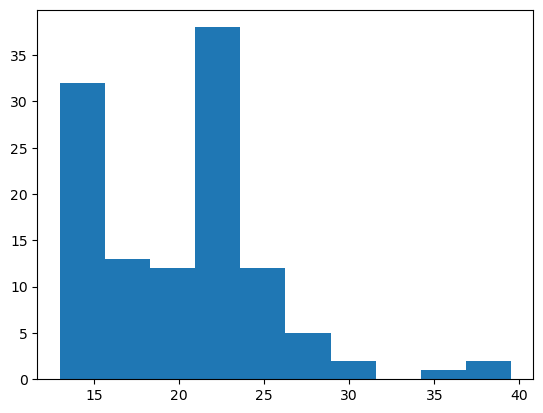

In [28]:
plt.hist(mpg_1999)
plt.show()

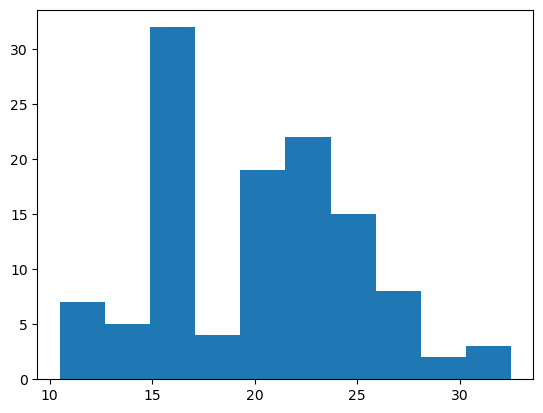

In [32]:
plt.hist(mpg_2008)
plt.show()

In [33]:
# even though the distributions are not exactly normal, with sample size of 117,
# and no significant outliers, by the CLT they should produce normal distributions
# of the sample means.

In [35]:
# test the relative variance:
stats.levene(mpg_1999, mpg_2008)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [36]:
# the p_value > α=0.05, therefore reject H0 that variances are equal.

In [38]:
t_stat_3a, p_value_3a = stats.ttest_ind(mpg_1999, mpg_2008, equal_var=True)

In [39]:
t_stat_3a

0.21960177245940962

In [41]:
p_value_3a

0.8263744040323578

In [42]:
p_value_3a < α

False

#### 3a. ANSWER: p is not less than alpha, therefore cannot reject the null hypothesis that there is a significant difference between the mean mpg in 2008 and 1999.

#### 3b. - Are compact cars more fuel-efficient than the average car?


In [44]:
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5


In [ ]:
# 'compact' is a subcategory of 'class' column
# comparing to *all* cars so...
# Type of test will be one-sample
# 'Are compact *more* fuel efficient?' so this is one-tailed test

# validation of assumptions:
    # Random: assuming the mpg sampling methodology was good.
    # Independence: Yes. compact will be separated from all cars
    # Normal: yes, and over thirty sample sizes
    # Equal Var: n/a for this type of test


H$_0$: Compact cars are less than or the same fuel efficiency as the average car

H$_a$: Compact cars are more fuel efficient than the overall average of cars

In [59]:
compact_mpg = mpg[mpg['class'] == 'compact'].cty_hwy_avg
print(f'There were {len(compact_mpg)} compact models\n and {len(mpg.model)} total models in the dataset.' )


There were 47 compact models
 and 234 total models in the dataset.


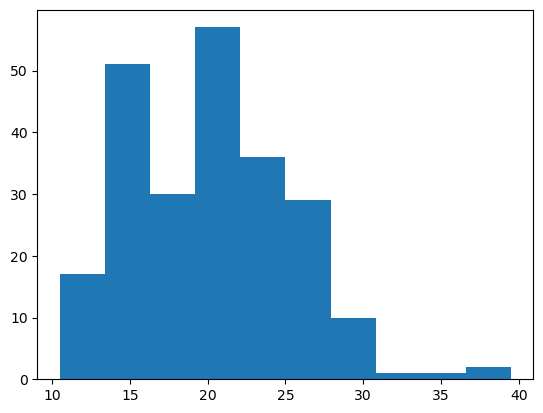

In [60]:
plt.hist(mpg.cty_hwy_avg)
plt.show()

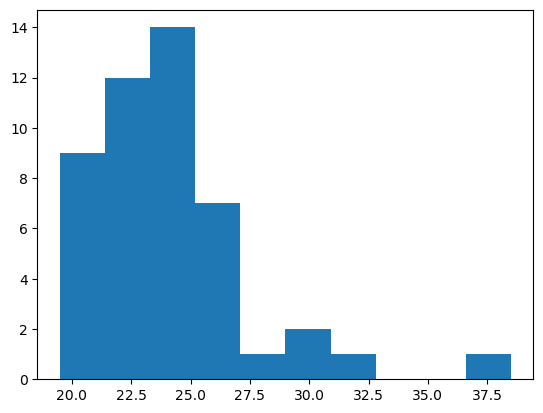

In [61]:
plt.hist(compact_mpg)
plt.show()

In [70]:
avg_mpg_all_models = mpg.cty_hwy_avg.mean()
avg_mpg_all_models
t_stat_3b, p_value_3b = stats.ttest_1samp(compact_mpg, avg_mpg_all_models)
print(f't={t_stat_3b}, p={p_value_3b}')

t=7.896888573132533, p=4.1985637943171486e-10


In [72]:
# divide p by two for one_tail test:
(p_value_3b / 2 < α) & (t_stat_3b > 0)

True

#### 3b. ANSWER: p/2 < α, t > 0 therefore reject the null hypothesis that compact cars have the same fuel efficiency as the average car. 

#### 3c. Do manual cars get better gas mileage than automatic cars?


In [74]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,cty_hwy_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [76]:
# have to filter the 'trans' column for manual and auto and store as vars

auto_trans_mpg = mpg[mpg.trans.str.startswith('auto')].cty_hwy_avg
man_trans_mpg = mpg[mpg.trans.str.startswith('manual')].cty_hwy_avg

# Type of test needed:
#     two-sample t-test because of two subcategories
#     one_tailed because asking for directionality
# validate assumptions:
#     random: yes. trusting study methodology
#     independent: yes. two separate subcategories
#     normal: yes.
#     variance equal?: No. Must use Walsh option

H$_0$: manual transmission cars get the same or worse gas mileage than automatic cars

H$_a$: manual transmission cars get better gas mileage than automatic cars.

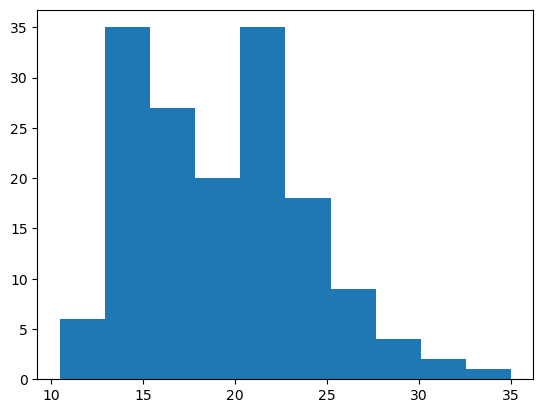

In [78]:
# check for normalcy
plt.hist(auto_trans_mpg)
plt.show()

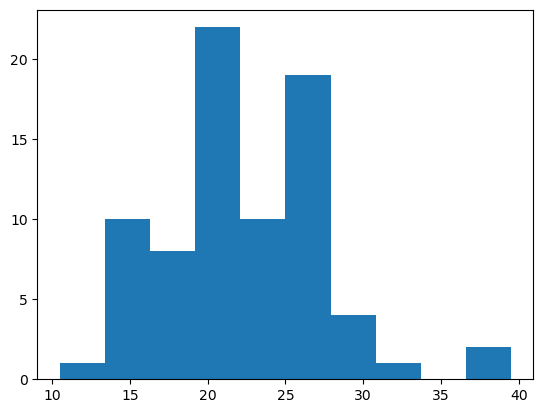

In [80]:
plt.hist(man_trans_mpg)
plt.show()

In [81]:
#both normal-ish

In [88]:
# check for equal variance with levene
stats.levene(man_trans_mpg, auto_trans_mpg)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [89]:
# cannot reject the null hyp that the variances are equal


In [90]:
t_stat_3c, p_value_3c = stats.ttest_ind(man_trans_mpg, auto_trans_mpg, equal_var=False)

In [94]:
(p_value_3c / 2 < α) & (t_stat_3c > 0)

True

In [92]:
t_stat_3c

4.443514012903072

In [93]:
p_value_3c

1.7952248999917893e-05

#### 3c. Reject the null hypothesis that manual transmission cars get the same or worse gas mileage than automatic cars.